<center> GRADING BOX (please do not modify)</center>

> ***P***resentation: x/10

> ***O***rganization, labeling, cleanliness, clarity: x/10

> ***C***ontent: x/25

> ***A***uthenticity, personal effort and originality: x/*5*

# DSA501 Final Part 1
## Fall 2023
### Steve Lucas



<font face=arial><font size=6><center> Instructions</center>

<font face=times><font size=3>
1. This test is open book and internet, but cannot be discussed or shared with other people. The work shown MUST be your original work using the tools you have learned and the tools you can find WITHOUT DIRECT HELP from other people. In particular, copy/paste from LLMs is not allowed; LLMs can teach you concepts and answer questions, but you have to write the answers.

2. The rubric is the same as always, and it is reflected in the grading box at the top of the notebook.

3. Answer the questions below the statement of the questions. Do not modify the Instructions or the questions.

4. Your notebook should be able to be run by the instructor. Hence, all the references to files must be done using the Unix server. None of the data files should be stored in your Google drive.

5. All the information about your answer should be included (urls, etc.). Do not include extraneous code or information.

6. Use text cells to write explanations and code cells to write code and comments.



## <font face = arial> <font color=Magenta> Question 1

***Goal***: Use the information from https://registrar.buffalostate.edu/courses to create a dataframe of the number of undergraduate classes (counted by crn, not name; in other words, each section of a class counts) in every department at Buffalo State from 2015 to 2023 (do not include summers). SUGGESTION (follow as much as possible, but modify if you find a better way to present the data):The DataFrame should be grouped by (using groupby) so that each year is in one column, and for each year the semesters are in the next, and for each semester, the departments next and finally the number of courses. NOTE: The data from previous years can be guessed by changing the url manually.

***Tools required to get credit***: some of the following -- pandas,grupby,  numpy, requests, the links from the website https://registrar.buffalostate.edu/courses.

***Submit***: Include your work in the cells below.


## Strategy
In order to successfully scrape the the course information from Buffalo State's Registrar's website, it is necessary to understand both the URL (Uniform Resource Locator) link structure as well as the HTML (Hypertext Markup Language) structure that organizes the data.

### Getting Data From Every Year (2015-2023)
From investigation, it can be deduced that the entirety of the [Fall 2023 Course Data](http://bscintra.buffalostate.edu/msched/202330-all_courses_ug.html) could be accessed via http://bscintra.buffalostate.edu/msched/202330-all_courses_ug.html and that [Spring 2023 Course Data](http://bscintra.buffalostate.edu/msched/202310-all_courses_ug.html) at http://bscintra.buffalostate.edu/msched/202310-all_courses_ug.html. 

Note that all that needs to be done to access previous years, is modifying the year(2023) in the url to previous years.

### Getting Course Data By Department
Once accessing the pages above, the HTML structure is actually quite convenient. From this screenshot, observe how each department section begins in a HTML div container where class equals "dept":

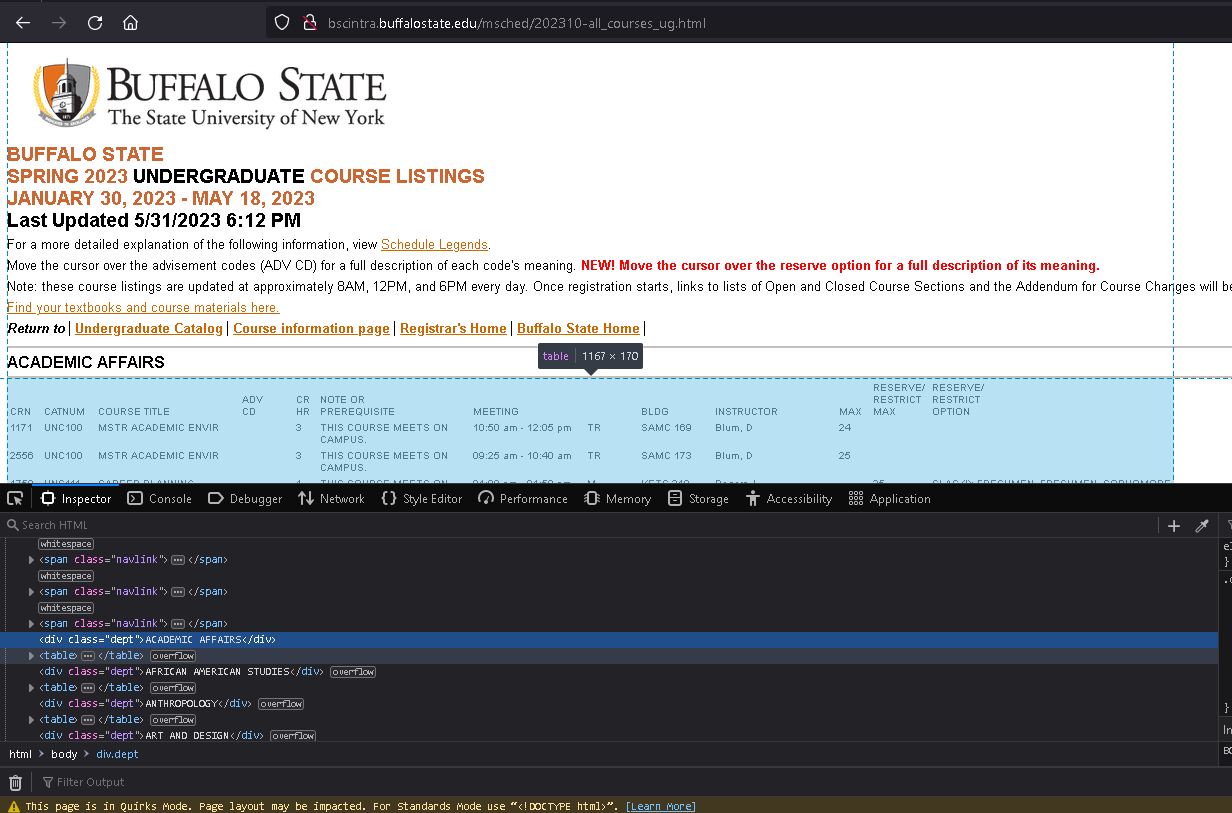

This allows us to use the Python libraries **requests** and **BeautifulSoup** to wrangle every one of these div containers and it's elements containing the department name and table of courses. 

After downloading the data, we can construct a dataframe containing every course section for every department from every year requested.

### Import Necessary Libraries

In [4]:
import requests, pandas as pd
from bs4 import BeautifulSoup
from io import StringIO


### Wrangle Each Year's Data

In [22]:
years = list(range(2015, 2024)) # Inclusive at first index, exclusive at last.
df = pd.DataFrame() # Dataframe to persist data through retrieval

In [23]:


for year in years:
       fall_link = f"http://bscintra.buffalostate.edu/msched/{year}30-all_courses_ug.html"
       spring_link = f"http://bscintra.buffalostate.edu/msched/{year}10-all_courses_ug.html"
       
       fall_response = requests.get(fall_link)
       spring_response = requests.get(fall_link)
       
       fall_soup = BeautifulSoup(fall_response.content, 'html.parser')
       spring_soup = BeautifulSoup(spring_response.content, 'html.parser')
       
       fall_department_divs = fall_soup.find_all('div', class_='dept')
       spring_department_divs = spring_soup.find_all('div', class_='dept')
       
       # iterate through fall courses
       for fall_department_div in fall_department_divs:
              if fall_department_div.text:
                     dep_name = fall_department_div.text.strip() # department name is in bold
                     courses_table = fall_department_div.find_next_sibling('table') # get course listings  & info immediately after
                     fall_df = pd.read_html(StringIO(str(courses_table)))[0] # get raw html and convert to DataFrame
                     # set pertinent columns for question 1
                     fall_df['Year'] = year
                     fall_df['Department'] = dep_name
                     fall_df['Semester'] = "Fall"
                     # add to persistent DF
                     df = pd.concat([df, fall_df], ignore_index=True)
              
        # iterate through spring courses
       for spring_department_div in spring_department_divs:
              if spring_department_div.text:
                     dep_name = spring_department_div.text.strip() # department name is in bold
                     courses_table = spring_department_div.find_next_sibling('table') # get course listings  & info
                     spring_df = pd.read_html(StringIO(str(courses_table)))[0] # get raw html and convert to DataFrame
                     # set pertinent columns for question 1
                     spring_df['Year'] = year
                     spring_df['Department'] = dep_name
                     spring_df['Semester'] = "Spring"
                     # add to persistent DF
                     df = pd.concat([df, spring_df], ignore_index=True)
                     
df.describe()

,CRN,CR HR,MAX,RESERVE/ RESTRICT MAX,Year
count,29220.000000,29220.000000,14884.000000,14336.000000,29220.00000
mean,2426.926283,3.013689,26.866568,24.029715,2018.68501
std,1041.559909,1.410197,18.553751,22.081842,2.51353
min,1003.000000,0.000000,0.000000,0.000000,2015.00000
25%,1556.000000,3.000000,20.000000,14.000000,2016.00000
50%,2219.000000,3.000000,25.000000,20.000000,2019.00000
75%,3140.000000,3.000000,30.000000,27.000000,2021.00000
max,5368.000000,15.000000,323.000000,350.000000,2023.00000


In [27]:
df.describe(include="object")

,CATNUM,COURSE TITLE,ADV CD,NOTE OR PREREQUISITE,MEETING,Unnamed: 7,BLDG,INSTRUCTOR,RESERVE/ RESTRICT OPTION,Department,Semester
count,29220,29220,18644,20568,28928,23862,28766,29220,29220,29220,29220
unique,1547,1768,327,3885,571,74,614,1480,820,67,2
top,CWP101,COLLEGE WRITING I,"Basic Communicatio, GE2KA, IF; Basic Written a...","OL-S ALL COURSE ACTIVITY COMPLETED ONLINE, REQ...",TBD,TR,ONLINE,STAFF,Reserved seats available as indicated:,MUSIC,Fall
freq,1078,1078,1256,384,4320,9342,3770,364,14884,2420,14610


In [28]:
df.columns

Index(['CRN', 'CATNUM', 'COURSE TITLE', 'ADV CD', 'CR HR',
       'NOTE OR PREREQUISITE', 'MEETING', 'Unnamed: 7', 'BLDG', 'INSTRUCTOR',
       'MAX', 'RESERVE/ RESTRICT MAX', 'RESERVE/ RESTRICT OPTION', 'Year',
       'Department', 'Semester'],
      dtype='object')

### Aggregate Data According to Question Spec:
"The DataFrame should be grouped by (using groupby) so that each year is in one column, and for each year the semesters are in the next, and for each semester, the departments next and finally the number of courses."

In order to accomplish the above we must use the **groupby()** function to group the dataframe for each year by department and the number of course sections that department is offering that semester.


In [29]:
groupby_df = df.groupby(['Year', 'Semester','Department'])['CRN'].count().reset_index()
groupby_df.head()

,Year,Semester,Department,CRN
0,2015,Fall,AFRICAN AMERICAN STUDIES,3
1,2015,Fall,ANTHROPOLOGY,21
2,2015,Fall,ART EDUCATION,25
3,2015,Fall,BIOLOGY,48
4,2015,Fall,BUSINESS,80


Let's rename the 'CRN' column so it's obvious what was just done.

In [30]:
groupby_df.rename(columns={"CRN": "Number of Course Sections"}, inplace = True)

In [31]:
groupby_df.head()

,Year,Semester,Department,Number of Course Sections
0,2015,Fall,AFRICAN AMERICAN STUDIES,3
1,2015,Fall,ANTHROPOLOGY,21
2,2015,Fall,ART EDUCATION,25
3,2015,Fall,BIOLOGY,48
4,2015,Fall,BUSINESS,80


Now, we must use the **pivot** to organize the data further according to spec. We want each year to have its own column in order to observe how many courses that department offered that semester, if any. 

In [32]:
# Pivot the grouped DataFrame to have each year in one column and semesters as the next columns
pivoted_df = groupby_df.pivot(index=['Semester', 'Department'], columns='Year', values='Number of Course Sections').reset_index()
pivoted_df.head()

Year,Semester,Department,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Fall,ACADEMIC AFFAIRS,NaN,NaN,NaN,31.0,29.0,9.0,16.0,4.0,26.0
1,Fall,AFRICAN AMERICAN STUDIES,3.0,2.0,8.0,7.0,14.0,15.0,15.0,9.0,8.0
2,Fall,ANTHROPOLOGY,21.0,24.0,24.0,20.0,21.0,19.0,18.0,14.0,11.0
3,Fall,ART & DESIGN,NaN,NaN,NaN,125.0,155.0,144.0,NaN,NaN,NaN
4,Fall,ART AND DESIGN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,116.0,101.0


For data integrity purposes, the NANs should be replaced with 0's.

In [33]:
# Fill any missing values with 0
pivoted_df = pivoted_df.fillna(0)

And then the dataframe should be saved in CSV format to remove the need for rescraping.

In [34]:
pivoted_df.to_csv("BSU_Dep_Course_Sections.csv")

## <font face = arial> <font color=magenta> Question 2

***Goal***: Create a web page with the DataFrame from Question 1 and publish it in github. (HELP: https://www.youtube.com/watch?v=OltY8JIaP-4). The page should be well presented and easy to read.

***Tools required to get credit***: No restrictions.

***Submit***: Write an explanation in the cells below of what you did and include a link that the grade can link to check your github link. Use a text cell for explanations and code cells for code.

## GitHub Repo & GitHub Pages

[GitHub](https://github.com) possesses features for projects and repos to have static web pages (JS, HTML, CSS with no server interactivity) in order to help present the code and materials contained within them. To accomplish Question 2's goal, we can convert the DataFrame to a HTML table and then host it there as long as it belongs to a valid project. 

### Prerequisites
- GitHub Account
- Local Git client configured with GitHub Credentials

### Outline
1. Convert DataFrame to index.html file. 
2. Initialize Git project
3. Publish to GitHub
4. Activate GitHub Pages

### Convert DataFrame to HTML table.
First, we'll load the dataframe back in from our saved local CSV file from step 1 in order to convert it to html.

In [6]:
df = pd.read_csv('BSU_Dep_Course_Sections.csv')

In [7]:
# Remove duplicate index
df.drop(columns = ['Unnamed: 0'], inplace = True, axis = 1)

In [8]:
df.head()

,Semester,Department,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Fall,ACADEMIC AFFAIRS,0.0,0.0,0.0,31.0,29.0,9.0,16.0,4.0,26.0
1,Fall,AFRICAN AMERICAN STUDIES,3.0,2.0,8.0,7.0,14.0,15.0,15.0,9.0,8.0
2,Fall,ANTHROPOLOGY,21.0,24.0,24.0,20.0,21.0,19.0,18.0,14.0,11.0
3,Fall,ART & DESIGN,0.0,0.0,0.0,125.0,155.0,144.0,0.0,0.0,0.0
4,Fall,ART AND DESIGN,0.0,0.0,0.0,0.0,0.0,0.0,130.0,116.0,101.0


We can now convert the DataFrame to HTML along with some simple formatting.

In [9]:
html_table = df.to_html(classes='table table-bordered', index=False, escape=False)

with open('index.html', 'w') as file:
    file.write(html_table)

Now, that the HTML table file is saved we begin to work on the Git and GitHub requirements.

### Initialize Local Git Project
For the Git and GitHub portion, I'll be using my GitHub account at [https://github.com/stevel142](https://github.com/stevel142), but first we'll create a local project. 

In [1]:
!git init

Initialized empty Git repository in D:/Workspace/school/DSA501/DSA501_Final_BSU_Registrar_Courses/.git/


The above initialized a git project in the working directory of this Jupyter notebook that also contains the index.html file with the course data. After initializing, we can immediately add these files to the project with the following command.

In [10]:
!git add .

Git provides a warning since I am operating in the notebook file it is applying version control to. This can be safely ignored and we can confirm the additions by committing.

In [11]:
!git commit -m "Initial Commit For Project"

[master (root-commit) e3cd776] Initial Commit For Project
 3 files changed, 1897 insertions(+)
 create mode 100644 BSU_Dep_Course_Sections.csv
 create mode 100644 Final_part1_TakeHome_Steve_Lucas.ipynb
 create mode 100644 index.html


#### Publish to GitHub

Before linking our local project to a GitHub repo, we need to create the repo using a valid GitHub account. For my account I navigated to [https://github.com/stevel142?tab=repositories](https://github.com/stevel142?tab=repositories) and clicked on the new button following the site directions. I named the repo exactly the same as the local project folder. 

Now, we can link our local project with the empty GitHub repo.

In [12]:
!git remote add origin https://github.com/stevel142/DSA501_Final_BSU_Registrar_Courses.git

The above logically connects the project to the GitHub account while the next command literally uploads it. If your Git client is already authenticated to GitHub, you won't be prompted for credentials, but one might at this point.

In [14]:
!git push -u origin master

branch 'master' set up to track 'origin/master'.


To https://github.com/stevel142/DSA501_Final_BSU_Registrar_Courses.git
 * [new branch]      master -> master


We can now navigate to the project repo at GitHub at the following link [https://github.com/stevel142/DSA501_Final_BSU_Registrar_Courses](https://github.com/stevel142/DSA501_Final_BSU_Registrar_Courses):

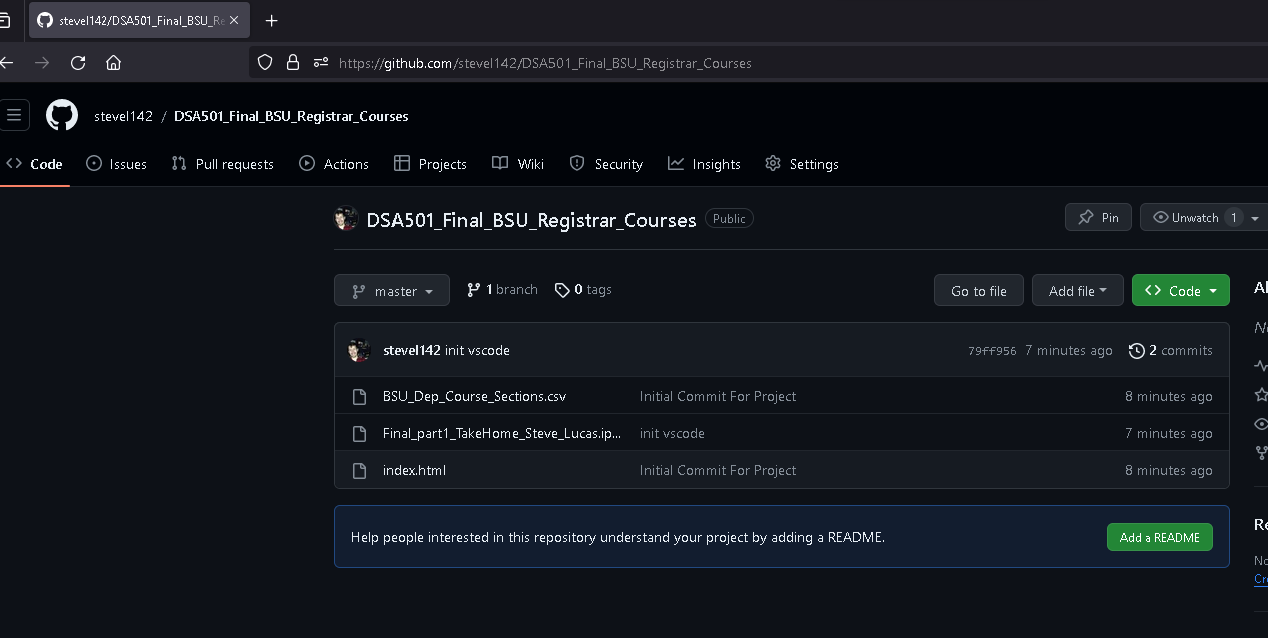

### Activate GitHub Page
Our final step is activating the GutHub Page for the repo by navigating to the settings menu for the repo. From there, we can click on the Pages menu on the left hand side:
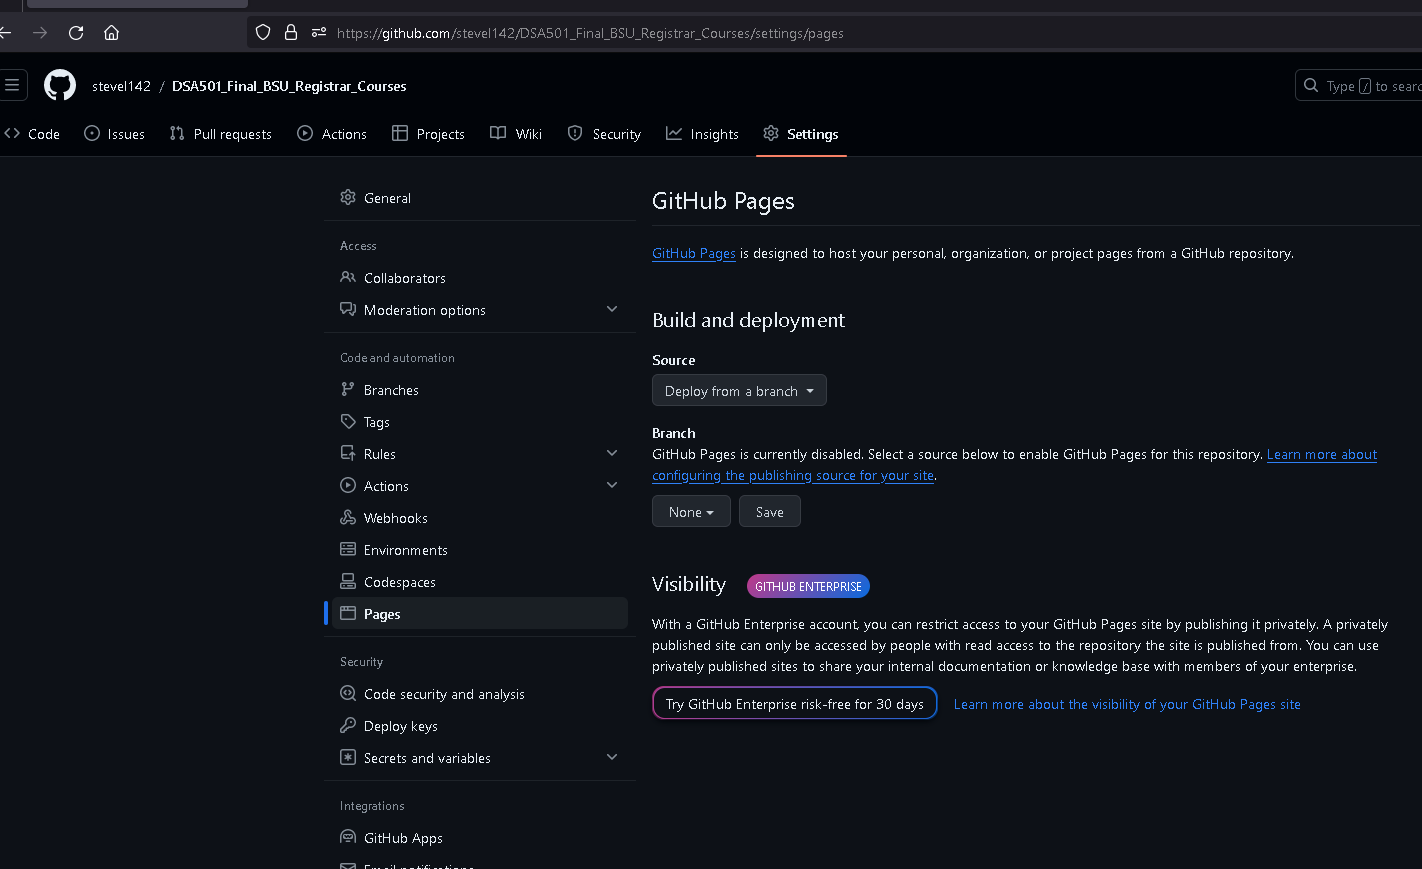

The simplest way is to now activate the master branch: 

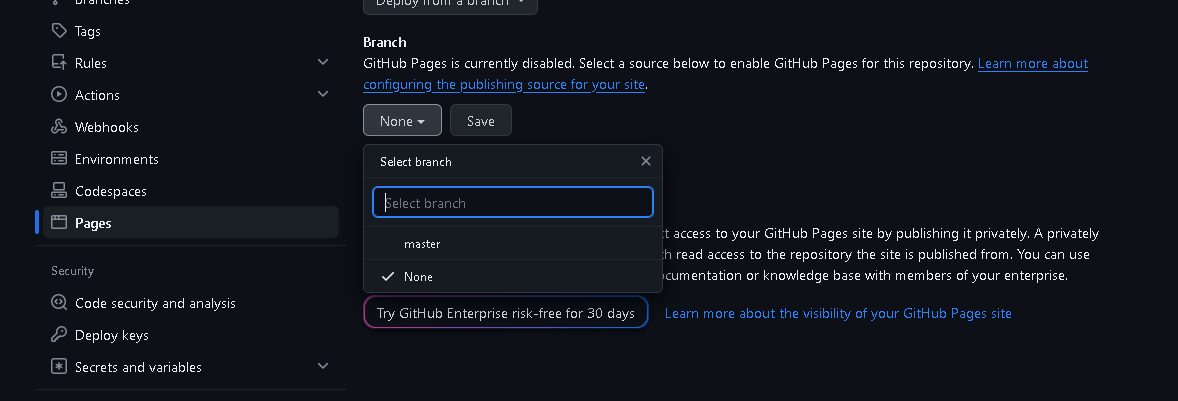

Remember to click save:

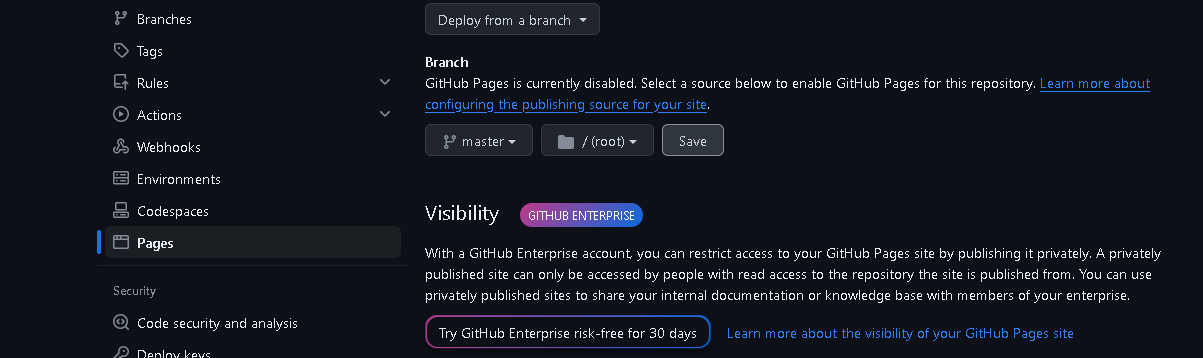

GitHub will display that the site is currently being built as it starts to deploy the HTML page:

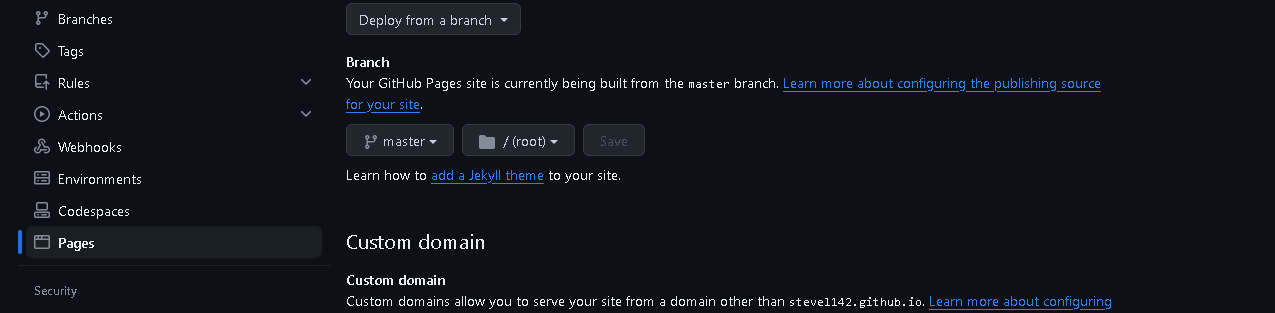

When it is ready, at the top of the page, GitHub will provide a link [https://stevel142.github.io/DSA501_Final_BSU_Registrar_Courses/](https://stevel142.github.io/DSA501_Final_BSU_Registrar_Courses/):

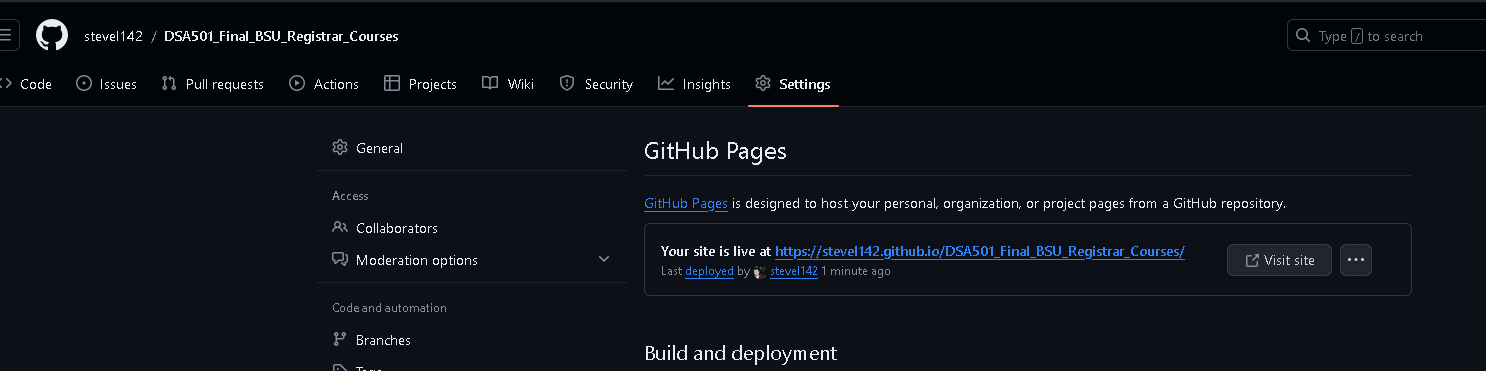

because we named our HTML tabular data index.html, it should automatically be visible with the provided link, W [https://stevel142.github.io/DSA501_Final_BSU_Registrar_Courses/](https://stevel142.github.io/DSA501_Final_BSU_Registrar_Courses/), which it is: 

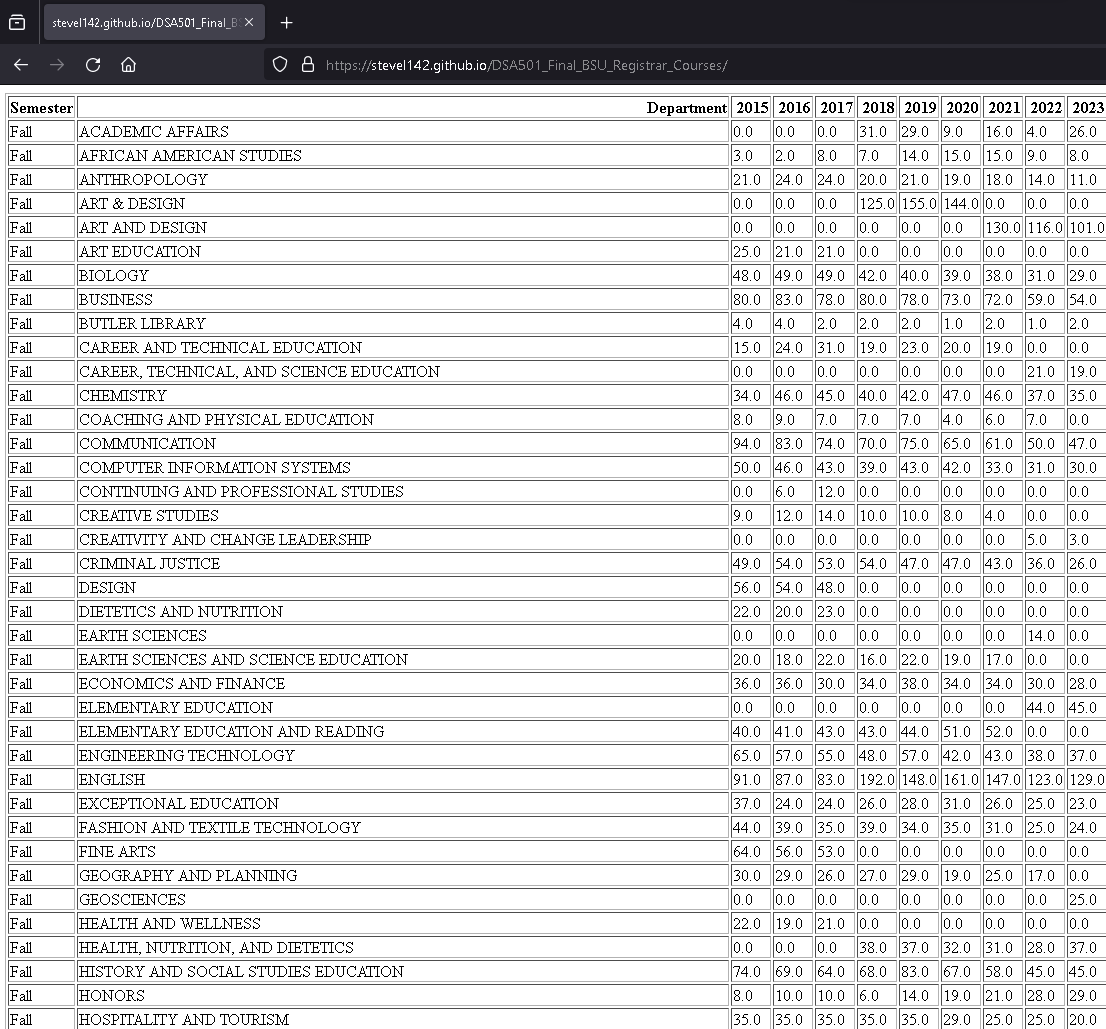

## <font face = arial> <font color=magenta> Question 3

***Goals***: (1) Create LaTeX document (in Overleaf.com) that contains the DataFrame from Question 1 nicely formatted as a mini-report, explaining what the document is, with a title, a short bibliography, etc. (2) Create a symbolic link in the homefolder in your server account called Last_name-Final that links to a folder called Last_name_Web in the folder /var/www/html. (3) upload the .tex and the .pdf files to your folder in the Ubuntu server.

***Tools required to get credit***: Overleaf, pandas.

***Submit***: The code and an explanation of the steps you followed to accomplish the goals. Include a link to see your work in the Ubuntu server.

## LaTeX & Linux

In order to fulfill question 3's requirements, we must use pandas to convert the tabular course data to LaTex tabular data, and then use Overleaf to make the LaTeX table more presentable before compilation to PDF is performed. Finally, we'll use some basic Linux commands and an existing Apache web server to display the PDF from a web perspective.

First, we'll read in the CSV data again to start fresh.

In [15]:
df = pd.read_csv('BSU_Dep_Course_Sections.csv')

In [17]:
# Remove duplicate index
df.drop(columns = ['Unnamed: 0'], inplace = True, axis = 1)

In [18]:
df.head()

,Semester,Department,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Fall,ACADEMIC AFFAIRS,0.0,0.0,0.0,31.0,29.0,9.0,16.0,4.0,26.0
1,Fall,AFRICAN AMERICAN STUDIES,3.0,2.0,8.0,7.0,14.0,15.0,15.0,9.0,8.0
2,Fall,ANTHROPOLOGY,21.0,24.0,24.0,20.0,21.0,19.0,18.0,14.0,11.0
3,Fall,ART & DESIGN,0.0,0.0,0.0,125.0,155.0,144.0,0.0,0.0,0.0
4,Fall,ART AND DESIGN,0.0,0.0,0.0,0.0,0.0,0.0,130.0,116.0,101.0


Next, we'll convert the DataFrame to LaTeX using some formatting parameters that will help the multi-page data display better.

In [27]:
latex_table = df.to_latex(column_format = "|c|c|l|", caption = "Buffalo State Course Section Counts",
                          label = "tab:buf_state_course_table", bold_rows = True, longtable = True, escape = True)

When converting, & chars appear to need explicitly escaped.

In [29]:
latex_table = latex_table.replace('&', '\\&')

Then, we'll save it so we can open it in Overleaf.

In [31]:
with open('buf_state_course_table_steve_lucas.tex', 'w') as file:
    file.write(latex_table)

With the raw LaTeX source code, I simply copy and pasted it into the middle of a project in Overleaf after the "\begin{document}" statement. The table needed significant reformatting within LaTex to produce a readable table, but some of the more useful operations were ensuring that the table used more space from the left margin using the following command: 

```latex
\usepackage[margin=1in]{geometry} 
```

Also, setting the header cell lengths manually greatly helped:

```latex
\begin{longtable}[]{|l|p{4cm}|p{0.8cm}|p{0.8cm}|p{0.8cm}|p{0.8cm}|p{0.8cm}|p{0.8cm}|p{0.8cm}|p{0.8cm}|p{0.8cm}|}
```

### Serving the PDF with Apache & Linux
Since we have a good PDF to work with, we can upload it to the class server, create a symbolic link to a folder under /var/www/html/, and get the document served over the web. 


A straightforward way of getting the files onto the server is WinSCP, which I used here:

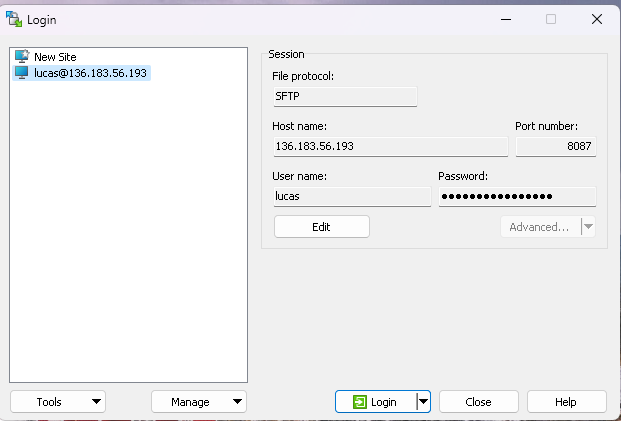

From the above image, one can observe the necessary connection information required. Then, we can simply upload the data to our home directory:

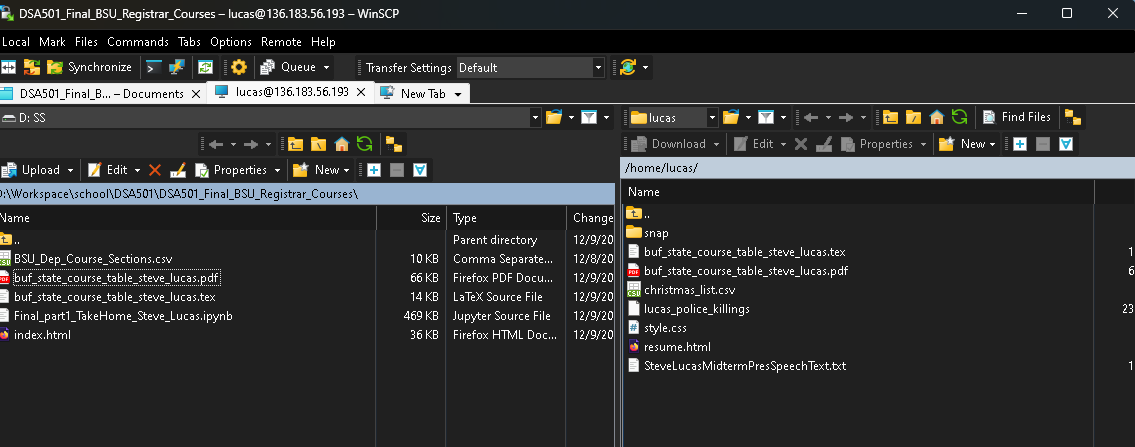



Then, using putty with similar connection information, we can observe the files using the command

```bash
ls -al
```

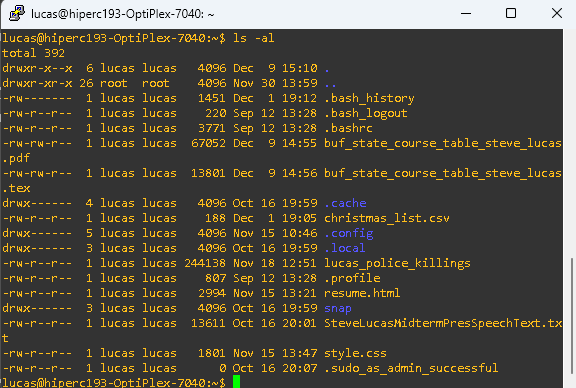

The question required us to make a symbolic link called Last_name-Final, or Lucas-Final in my case, that can be linked to Lucas_Web under /var/www/html/.

First, we make the Web folder under /var/www/html that our user maintains ownership for.

```bash
sudo mkdir /var/www/html/Lucas_Web
sudo chown lucas:lucas /var/www/html/Lucas_Web
```

We then want to create a symbolic called Lucas-Final to the created folder

```bash
ln -s /var/www/html/Lucas_Web Lucas-Final 
```

Finally, we'll move the tex and pdf file to Lucas_Web through the link while in our home directory

```bash
mv buf_state_course_table_steve_lucas.* Lucas-Final
```

Now, we can access the files via [File Index Page](http://136.183.56.193/Lucas_Web/). If we wanted to update these documents or add any more, we upload to the server via Lucas-Final to do so conveniently after creating the link.